# Speech Processing

**Dealing with Audio**

Different kinds all of audio 􀃗les

* mp3
* wav
* m4a
* flac

Digital sounds measured in frequency (kHz)

* 1 kHz = 1000 pieces of information per second
* Streaming songs have a frequency of 32 kHz
* Audiobooks and spoken language are between 8 and 16 kHz

In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

In [2]:
good_morning = wave.open("../meta/good-morning.wav", "r")
soundwave_gm = good_morning.readframes(-1)

soundwave_gm[:10]

b'\xfd\xff\xfb\xff\xf8\xff\xf8\xff\xf7\xff'

**Converting bytes to integers**

* Can't use bytes
* Convert bytes to integers using numpy

In [3]:
signal_gm = np.frombuffer(soundwave_gm, dtype='int16')
signal_gm[:10]

array([ -3,  -5,  -8,  -8,  -9, -13,  -8, -10,  -9, -11], dtype=int16)

**Finding the frame rate**

* Frequency (Hz) = length of wave object array/duration of audio 

In [4]:
framerate_gm = good_morning.getframerate()
framerate_gm

48000

**Finding sound wave timestamps**

In [5]:
time_gm = np.linspace(start=0, stop=len(signal_gm)/framerate_gm, num=len(signal_gm))
time_gm[:10]

array([0.00000000e+00, 2.08334167e-05, 4.16668333e-05, 6.25002500e-05,
       8.33336667e-05, 1.04167083e-04, 1.25000500e-04, 1.45833917e-04,
       1.66667333e-04, 1.87500750e-04])

**Visualizing sound waves**

In [6]:
good_afternoon = wave.open("../meta/good-afternoon.wav", "r")
soundwave_ga = good_afternoon.readframes(-1)
signal_ga = np.frombuffer(soundwave_ga, dtype='int16')
framerate_ga = good_afternoon.getframerate()
time_ga = np.linspace(start=0, stop=len(signal_ga)/framerate_ga, num=len(signal_ga))

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


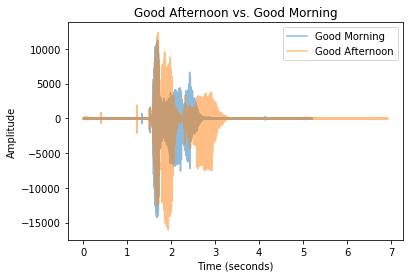

In [7]:
plt.title("Good Afternoon vs. Good Morning")

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")


plt.plot(time_gm, signal_gm, label="Good Morning", alpha=0.5)
plt.plot(time_ga, signal_ga, label ="Good Afternoon", alpha=0.5)

plt.legend()
plt.show()

**Speech Recognition**
```
pip install SpeechRecognition
```

In [8]:
import speech_recognition as sr
recognizer = sr.Recognizer()
recognizer.energy_threshold = 300

Recognizer class has built-in functions which interact with speech APIs

* recognize_bing()
* recognize_google()
* recognize_google_cloud()
* recognize_wit()

Input: audio_file

Output: transcribed speech from audio_file

In [9]:
with sr.AudioFile("../meta/good-afternoon.wav") as audio_file:
    # For handling bg noise
    recognizer.adjust_for_ambient_noise(audio_file,duration=0.5)
    audio_data = recognizer.record(audio_file, duration=None, offset=None)

results = recognizer.recognize_google(audio_data=audio_data, language="en-US", show_all=True)
print(results)

{'alternative': [{'transcript': 'good afternoon', 'confidence': 0.92995483}, {'transcript': 'good afternoon n'}, {'transcript': 'good afternoon I'}, {'transcript': 'good afternoon in'}, {'transcript': 'good afternoon time'}], 'final': True}


**Audio Manipulation**
```
pip install pydub
pip install simpleaudio
```

If using files other than `.wav` ffmpeg is required

In [10]:
from pydub import AudioSegment

wav_file = AudioSegment.from_file(file="../meta/wav_file.wav")
type(wav_file)

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


pydub.audio_segment.AudioSegment

**Playing an audio**

In [11]:
from pydub.playback import play
play(wav_file)

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\pydub\utils.py:184: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


**Audio parameters**

In [12]:
# Check number of channels
print(wav_file.channels)

# Check frame rate
print(wav_file.frame_rate)

# Find the number of bytes per sample
print(wav_file.sample_width)

# Find the max amplitude
print(wav_file.max)

# Duration of audio file in milliseconds
print(len(wav_file))

2
48000
2
8484
3284


**Changing audio parameters**
```
changed_audio_segment = audio_segment.set_ATTRIBUTENAME(x)
```

**Decreasing/Increasing the volume**

In [13]:
play(wav_file)
quieter_wav_file = wav_file - 10
play(quieter_wav_file)
louder_wav_file = wav_file + 10
play(louder_wav_file)

**Normalizing the Audio**

In [14]:
from pydub.effects import normalize

In [15]:
normalized = normalize(wav_file)
play(wav_file)

**Remixing your audio**

In [16]:
part_1 = AudioSegment.from_file('../meta/slicing_part_1.wav')
part_2 = AudioSegment.from_file('../meta/slicing_part_2.wav')

play(part_1)
play(part_2)

# Remove the first four seconds of part 1
part_1_removed = part_1[4000:]

# Add the remainder of part 1 and part 2 together
part_3 = part_1_removed + part_2
play(part_3)

**Splitting stereo audio to mono**

In [17]:
stereo_phone_call = AudioSegment.from_file('../meta/stereo_call.wav')
print(f"Stereo number channels: {stereo_phone_call.channels}")
play(stereo_phone_call)

# Split stereo phone call and check channels
channels = stereo_phone_call.split_to_mono()
print(f"Split number channels: {channels[0].channels}, {channels[1].channels}")

# Save new channels separately
phone_call_channel_1 = channels[0]
phone_call_channel_2 = channels[1]

play(phone_call_channel_1)
play(phone_call_channel_2)

Stereo number channels: 2
Split number channels: 1, 1


**Export audio file**
```
modified_wav_file.export(out_f="modified_wav_file.wav", format="wav")
```